# CROP RECOMMENDER SYSTEM USING KNOWLEDGE GRAPHS

In [ ]:
import zipfile
import os

# Define the path to the uploaded zip file
zip_file_path = '/content/archive (1).zip'

# Create a directory to extract the contents
extraction_path = '/content/extracted_data'
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the extracted files
extracted_files = os.listdir(extraction_path)
print("Extracted files:", extracted_files)


Extracted files: ['Crop_recommendation.csv']


In [ ]:
import os

# Define the path to the extracted folder
extracted_folder_path = '/content/extracted_data'

# List the files in the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print("Files in the extracted folder:", extracted_files)


Files in the extracted folder: ['Crop_recommendation.csv']


In [ ]:
import pandas as pd

# Define the path to the dataset file
dataset_file_path = os.path.join(extracted_folder_path, 'Crop_recommendation.csv')  # Replace with the correct filename

# Load the dataset
data = pd.read_csv(dataset_file_path)

# Inspect the dataset
print("First few rows of the dataset:")
print(data.head())

# Check the columns in the dataset
print("Columns in the dataset:", data.columns.tolist())


First few rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Columns in the dataset: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the numerical features to normalize
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Inspect the preprocessed dataset
print("Preprocessed dataset (normalized):")
print(data.head())


Preprocessed dataset (normalized):
          N         P      K  temperature  humidity        ph  rainfall label
0  0.642857  0.264286  0.190     0.345886  0.790267  0.466264  0.656458  rice
1  0.607143  0.378571  0.180     0.371445  0.770633  0.549480  0.741675  rice
2  0.428571  0.357143  0.195     0.406854  0.793977  0.674219  0.875710  rice
3  0.528571  0.214286  0.175     0.506901  0.768751  0.540508  0.799905  rice
4  0.557143  0.264286  0.185     0.324378  0.785626  0.641291  0.871231  rice


In [ ]:
from sklearn.cluster import KMeans

# Features for clustering
clustering_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Perform K-Means clustering (let’s assume 3 clusters for now)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[clustering_features])

# Inspect cluster assignments
print("Cluster Assignments:")
print(data[['Cluster', 'label']].head())


Cluster Assignments:
   Cluster label
0        2  rice
1        2  rice
2        2  rice
3        2  rice
4        2  rice


In [ ]:
# Re-run K-Means with the optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[clustering_features])

# Inspect cluster assignments
print("Updated Cluster Assignments:")
print(data[['Cluster', 'label']].head())


Updated Cluster Assignments:
   Cluster label
0        2  rice
1        2  rice
2        2  rice
3        2  rice
4        2  rice


In [ ]:
import seaborn as sns

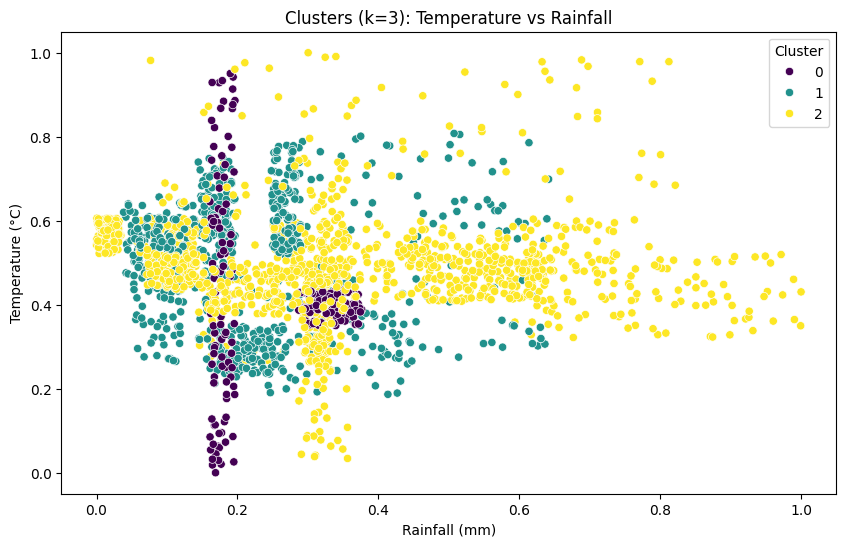

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters (temperature vs rainfall)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rainfall', y='temperature', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters (k=3): Temperature vs Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Temperature (°C)')
plt.show()


In [ ]:
# Group by cluster and crop type to see the distribution
cluster_distribution = data.groupby(['Cluster', 'label']).size().unstack(fill_value=0)
print("Crop Distribution Across Clusters:")
print(cluster_distribution)


Crop Distribution Across Clusters:
label    apple  banana  blackgram  chickpea  coconut  coffee  cotton  grapes  \
Cluster                                                                        
0          100       0          0         0        0       0       0     100   
1            0       0         95       100        0       0       0       0   
2            0     100          5         0      100     100     100       0   

label    jute  kidneybeans  ...  mango  mothbeans  mungbean  muskmelon  \
Cluster                     ...                                          
0           0            0  ...      0          0         0          0   
1           0          100  ...    100        100        39          0   
2         100            0  ...      0          0        61        100   

label    orange  papaya  pigeonpeas  pomegranate  rice  watermelon  
Cluster                                                             
0             0       0           0            0     0 

In [ ]:
from sklearn.cluster import KMeans

# Define the clustering features
clustering_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Iterate through k=3 and k=4
for k in [3, 4]:
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    data[f'Cluster_{k}'] = kmeans.fit_predict(data[clustering_features])  # Add new cluster column

    # Inspect cluster assignments (print only the current cluster column)
    print(f"\nCluster Assignments for k={k}:\n", data[[f'Cluster_{k}', 'label']].head())

    # Analyze cluster distribution (improved code)
    cluster_distribution = data.groupby([f'Cluster_{k}', 'label']).size().unstack(fill_value=0)
    print(f"\nCrop Distribution Across Clusters (k={k}):\n", cluster_distribution)



Cluster Assignments for k=3:
    Cluster_3 label
0          2  rice
1          2  rice
2          2  rice
3          2  rice
4          2  rice

Crop Distribution Across Clusters (k=3):
 label      apple  banana  blackgram  chickpea  coconut  coffee  cotton  \
Cluster_3                                                                
0            100       0          0         0        0       0       0   
1              0       0         95       100        0       0       0   
2              0     100          5         0      100     100     100   

label      grapes  jute  kidneybeans  ...  mango  mothbeans  mungbean  \
Cluster_3                             ...                               
0             100     0            0  ...      0          0         0   
1               0     0          100  ...    100        100        39   
2               0   100            0  ...      0          0        61   

label      muskmelon  orange  papaya  pigeonpeas  pomegranate  rice  \
Clus

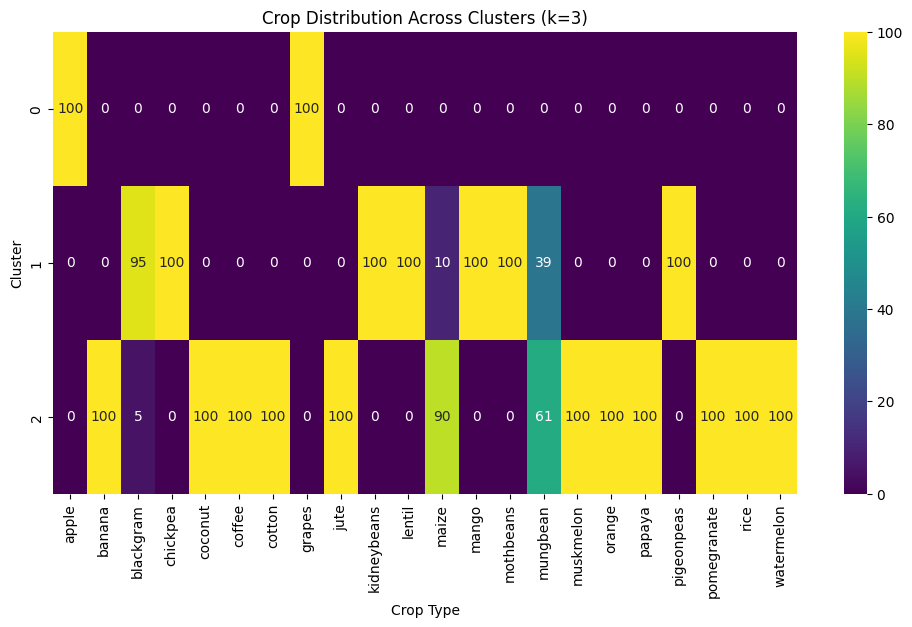

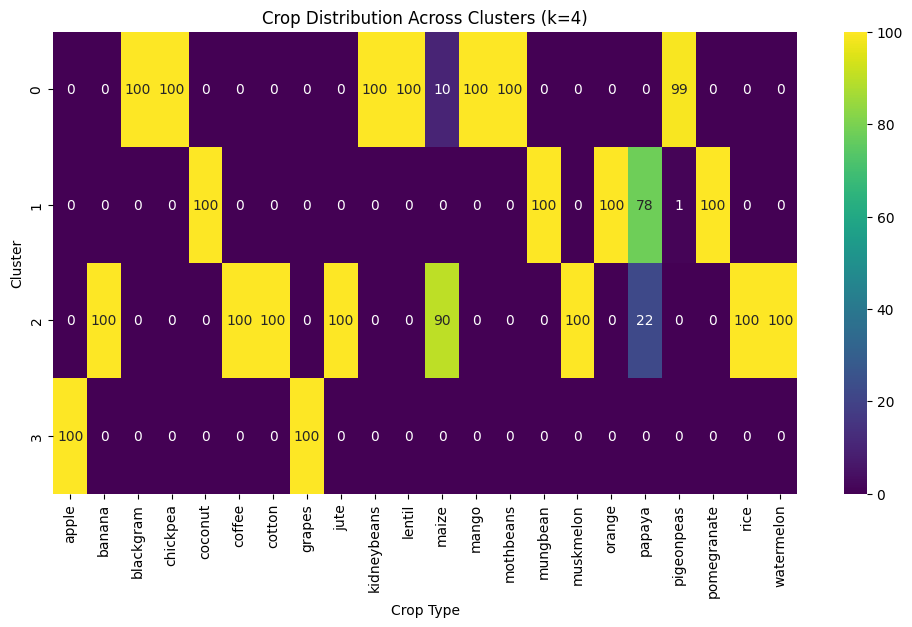

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through k=3 and k=4
for k in [3, 4]:
    # Create a heatmap of crop distribution across clusters
    cluster_distribution = data.groupby([f'Cluster_{k}', 'label']).size().unstack(fill_value=0)

    # Plot the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(cluster_distribution, annot=True, fmt="d", cmap="viridis")
    plt.title(f'Crop Distribution Across Clusters (k={k})')
    plt.xlabel('Crop Type')
    plt.ylabel('Cluster')
    plt.show()


In [ ]:
# Iterate through k=3 and k=4
for k in [3, 4]:
    # Calculate mean feature values for each cluster
    cluster_means = data.groupby(f'Cluster_{k}')[clustering_features].mean()

    # Print mean feature values
    print(f"\nMean Feature Values per Cluster (k={k}):\n", cluster_means)



Mean Feature Values per Cluster (k=3):
                   N         P         K  temperature  humidity        ph  \
Cluster_3                                                                  
0          0.157071  0.916964  0.975000     0.413620  0.849778  0.384591   
1          0.181672  0.382440  0.121411     0.488541  0.390645  0.467210   
2          0.499846  0.232530  0.150725     0.488660  0.802535  0.469582   

           rainfall  
Cluster_3            
0          0.254796  
1          0.225229  
2          0.349902  

Mean Feature Values per Cluster (k=4):
                   N         P         K  temperature  humidity        ph  \
Cluster_4                                                                  
0          0.189381  0.386238  0.123695     0.485584  0.368353  0.466603   
1          0.174247  0.181047  0.120919     0.508828  0.893977  0.475904   
2          0.671473  0.266045  0.165049     0.479340  0.750303  0.466279   
3          0.157071  0.916964  0.975000     0.4

In [ ]:
# Features for classification
X = data[clustering_features]

# Target variable (crop type)
y = data['label']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = nb.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.89      1.00      0.94        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
   

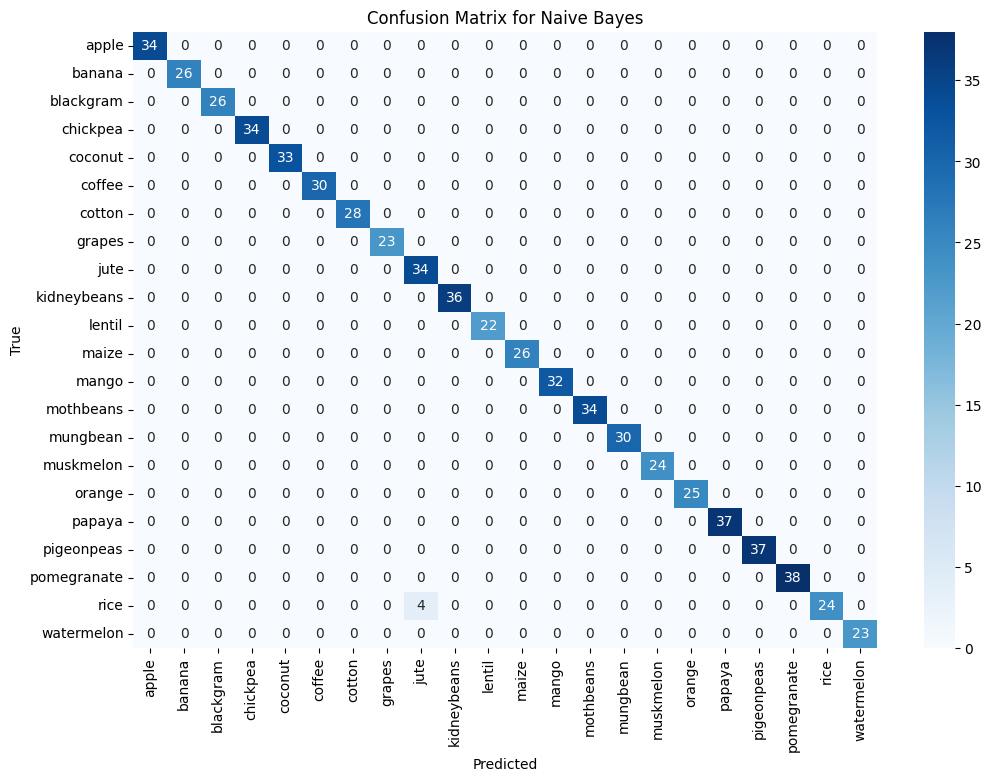

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix for Naive Bayes
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 7.2 MB/s eta 0:00:00


In [ ]:
from neo4j import GraphDatabase
import pandas as pd

# Neo4j connection details
NEO4J_URI = "neo4j+s://6e4cfb72.databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "6Sw2mlJZ_NxtZiZiE9DwX0EWndO2lcGXwYpIqzFxf-A"

# Initialize Neo4j connection
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# Load data from CSV file
data = pd.read_csv('/content/extracted_data/Crop_recommendation.csv')

# Function to create nodes and relationships
def create_neo4j_nodes(tx, data):
    for index, row in data.iterrows():
        # Merge AgroZone and Prediction nodes and create relationship
        tx.run("""
            MERGE (z:AgroZone {
                cluster_id: $cluster,
                temperature: $temperature,
                rainfall: $rainfall,
                pH: $ph
            })
            WITH z
            MERGE (p:Prediction {
                crop_type: $crop_type
            })
            MERGE (z)-[:PREDICTS]->(p)
        """, cluster=row['N'], temperature=row['temperature'],
        rainfall=row['rainfall'], ph=row['ph'], crop_type=row['label'])

# Execute the Neo4j transaction for node and relationship creation
with driver.session() as session:
    session.execute_write(create_neo4j_nodes, data)

# Verify relationship creation
with driver.session() as session:
    relationship_count = session.run("MATCH (z:AgroZone)-[:PREDICTS]->(p:Prediction) RETURN count(*)").single()[0]
    print(f"PREDICTS relationships created: {relationship_count}")


PREDICTS relationships created: 2200


In [ ]:
from neo4j import GraphDatabase
import pandas as pd

# Neo4j connection details
NEO4J_URI = "neo4j+s://6e4cfb72.databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "6Sw2mlJZ_NxtZiZiE9DwX0EWndO2lcGXwYpIqzFxf-A"

# Initialize Neo4j connection
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# Get the total number of AgroZone and Prediction nodes
with driver.session() as session:
    agrozone_count = session.run("MATCH (z:AgroZone) RETURN count(z)").single()[0]
    prediction_count = session.run("MATCH (p:Prediction) RETURN count(p)").single()[0]
    predicts_count = session.run("MATCH (z:AgroZone)-[:PREDICTS]->(p:Prediction) RETURN count(*)").single()[0]

    print(f"Total AgroZone nodes: {agrozone_count}")
    print(f"Total Prediction nodes: {prediction_count}")
    print(f"Total PREDICTS relationships: {predicts_count}")


Total AgroZone nodes: 2200
Total Prediction nodes: 22
Total PREDICTS relationships: 2200


In [ ]:
from neo4j import GraphDatabase
import pandas as pd

# Neo4j connection details
NEO4J_URI = "neo4j+s://6e4cfb72.databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "6Sw2mlJZ_NxtZiZiE9DwX0EWndO2lcGXwYpIqzFxf-A"

# Initialize Neo4j connection
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# Load data from CSV file
data = pd.read_csv('/content/extracted_data/Crop_recommendation.csv')

# Function to create nodes and relationships
def create_neo4j_nodes(tx, data):
    for index, row in data.iterrows():
        # Merge AgroZone and Prediction nodes and create relationship
        tx.run("""
            MERGE (z:AgroZone {
                nitrogen: $nitrogen,
                phosphorus: $phosphorus,
                potassium: $potassium,
                temperature: $temperature,
                humidity: $humidity,
                ph: $ph,
                rainfall: $rainfall
            })
            WITH z
            MERGE (p:Prediction {
                crop_type: $crop_type
            })
            MERGE (z)-[:PREDICTS]->(p)
        """,
        nitrogen=row['N'],
        phosphorus=row['P'],
        potassium=row['K'],
        temperature=row['temperature'],
        humidity=row['humidity'],
        ph=row['ph'],
        rainfall=row['rainfall'],
        crop_type=row['label'])

# Execute the Neo4j transaction for node and relationship creation
with driver.session() as session:
    session.execute_write(create_neo4j_nodes, data)

# Verify relationship creation
with driver.session() as session:
    relationship_count = session.run("MATCH (z:AgroZone)-[:PREDICTS]->(p:Prediction) RETURN count(*)").single()[0]
    print(f"PREDICTS relationships created: {relationship_count}")


PREDICTS relationships created: 4400


In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/extracted_data/Crop_recommendation.csv')

# Define a function to calculate suitability score (example)
def calculate_suitability(row):
    # This is a simplified example; adapt to your specific needs and domain knowledge
    score = 0
    if 15 <= row['temperature'] <= 35:  # Example temperature range
        score += 0.3
    if 6 <= row['ph'] <= 7.5:  # Example pH range
        score += 0.3
    if row['rainfall'] >= 100:  # Example rainfall threshold
        score += 0.4
    return min(score, 1.0)  # Ensure score is between 0 and 1

# Apply the function to each row
data['suitability_score'] = data.apply(calculate_suitability, axis=1)

# Save the updated CSV
data.to_csv('/content/extracted_data/Crop_recommendation_with_scores.csv', index=False)

print(data.head())  # Display the first few rows to verify


    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   suitability_score  
0                1.0  
1                1.0  
2                0.7  
3                1.0  
4                0.7  


In [ ]:
from neo4j import GraphDatabase
import pandas as pd

# Neo4j connection details
NEO4J_URI = "neo4j+s://6e4cfb72.databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "6Sw2mlJZ_NxtZiZiE9DwX0EWndO2lcGXwYpIqzFxf-A"

# Initialize Neo4j connection
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# Load data from CSV file (with suitability scores)
data = pd.read_csv('/content/extracted_data/Crop_recommendation_with_scores.csv')

# Function to create nodes and relationships
def create_neo4j_nodes(tx, data):
    for index, row in data.iterrows():
        # Merge AgroZone and Prediction nodes and create relationship
        tx.run("""
            MERGE (z:AgroZone {
                nitrogen: $nitrogen,
                phosphorus: $phosphorus,
                potassium: $potassium,
                temperature: $temperature,
                humidity: $humidity,
                ph: $ph,
                rainfall: $rainfall
            })
            WITH z
            MERGE (p:Prediction {
                crop_type: $crop_type
            })
            MERGE (z)-[r:PREDICTS {suitability_score: $suitability_score}]->(p)
        """,
        nitrogen=row['N'],
        phosphorus=row['P'],
        potassium=row['K'],
        temperature=row['temperature'],
        humidity=row['humidity'],
        ph=row['ph'],
        rainfall=row['rainfall'],
        crop_type=row['label'],
        suitability_score=row['suitability_score'])  # Add suitability score

# Execute the Neo4j transaction for node and relationship creation
with driver.session() as session:
    session.execute_write(create_neo4j_nodes, data)

# Verify relationship creation
with driver.session() as session:
    relationship_count = session.run("MATCH (z:AgroZone)-[r:PREDICTS]->(p:Prediction) RETURN count(*)").single()[0]
    print(f"PREDICTS relationships created: {relationship_count}")


PREDICTS relationships created: 6600


In [ ]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('/content/extracted_data/Crop_recommendation_with_scores.csv')

# Define a function to calculate suitability score
def calculate_suitability(row):
    score = 0

    # Temperature scoring (Gaussian function)
    temp_opt = 25  # Optimal temperature for the crop
    temp_std = 5   # Standard deviation
    temp_score = np.exp(-((row['temperature'] - temp_opt) ** 2) / (2 * temp_std ** 2))
    score += 0.4 * temp_score  # Weight: 0.4

    # pH scoring (range-based)
    if 6.0 <= row['ph'] <= 7.5:
        ph_score = 1.0
    else:
        ph_score = 0.0
    score += 0.3 * ph_score  # Weight: 0.3

    # Rainfall scoring (linear with threshold)
    if row['rainfall'] >= 100:
        rainfall_score = min(row['rainfall'] / 200, 1.0)  # Cap at 1.0
    else:
        rainfall_score = 0.0
    score += 0.3 * rainfall_score  # Weight: 0.3

    return min(score, 1.0)

# Apply the function to each row
data['suitability_score'] = data.apply(calculate_suitability, axis=1)

# Save the updated CSV
data.to_csv('/content/extracted_data/Crop_recommendation_refined.csv', index=False)

print(data.head())


    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   suitability_score  
0           0.884842  
1           0.924688  
2           0.669378  
3           0.982603  
4           0.548927  


In [ ]:
import pandas as pd

# Load the data from the Excel file
gdp_data = pd.read_excel('/content/API_NY.GDP.MKTP.KD.ZG_DS (GDP Growth - All Countries).xls', skiprows=4)

# Print the column names to inspect
print(gdp_data.columns)

# Drop unnecessary columns
# gdp_data = gdp_data.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 68'])


Index([                'Aruba',                   'ABW',
       'GDP growth (annual %)',     'NY.GDP.MKTP.KD.ZG',
                  'Unnamed: 4',            'Unnamed: 5',
                  'Unnamed: 6',            'Unnamed: 7',
                  'Unnamed: 8',            'Unnamed: 9',
                 'Unnamed: 10',           'Unnamed: 11',
                 'Unnamed: 12',           'Unnamed: 13',
                 'Unnamed: 14',           'Unnamed: 15',
                 'Unnamed: 16',           'Unnamed: 17',
                 'Unnamed: 18',           'Unnamed: 19',
                 'Unnamed: 20',           'Unnamed: 21',
                 'Unnamed: 22',           'Unnamed: 23',
                 'Unnamed: 24',           'Unnamed: 25',
                 'Unnamed: 26',           'Unnamed: 27',
                 'Unnamed: 28',           'Unnamed: 29',
                 'Unnamed: 30',      16.078431372549034,
             18.64864864864866,       12.12984054669704,
             3.961401726764848,

In [ ]:
import pandas as pd

# Load the data from the Excel file
gdp_data = pd.read_excel('/content/API_NY.GDP.MKTP.KD.ZG_DS (GDP Growth - All Countries).xls', skiprows=4)

# Print initial DataFrame info
print("Initial DataFrame:")
print(gdp_data.head())

# Display initial DataFrame columns for verification
print("\nInitial DataFrame Columns:")
print(gdp_data.columns)

# Rename the initial columns based on the actual column names in your file
gdp_data = gdp_data.rename(columns={
    gdp_data.columns[0]: 'Country Name',
    gdp_data.columns[1]: 'Country Code',
    gdp_data.columns[2]: 'Indicator Name',
    gdp_data.columns[3]: 'Indicator Code'
})

# Extract the number of GDP growth columns (assuming they start from index 4)
num_growth_columns = len(gdp_data.columns[4:])

# Manually create year labels for the GDP growth columns
# Assuming the data starts from 1960 and goes up to 2023 (or adjust as needed)
start_year = 1960
years = list(range(start_year, start_year + num_growth_columns))

# Assign year labels to the GDP growth columns
gdp_data.columns = list(gdp_data.columns[:4]) + years

# Print the updated column names
print("\nUpdated DataFrame Columns with Year Labels:")
print(gdp_data.columns)

# Melt the DataFrame to convert year columns into a single column
gdp_data_melted = pd.melt(
    gdp_data,
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    value_vars=years,
    var_name='Year',
    value_name='GDP Growth'
)

# Convert 'Year' to numeric (it should now represent actual years)
gdp_data_melted['Year'] = pd.to_numeric(gdp_data_melted['Year'], errors='coerce')
gdp_data_melted['GDP Growth'] = pd.to_numeric(gdp_data_melted['GDP Growth'], errors='coerce')

# Handle missing values (e.g., drop rows with NaN in 'GDP Growth')
gdp_data_melted = gdp_data_melted.dropna(subset=['GDP Growth'])

# Print the shape and head of transformed data
print("\nTransformed DataFrame Shape:")
print(gdp_data_melted.shape)
print("\nTransformed DataFrame:")
print(gdp_data_melted.head())


Initial DataFrame:
                         Aruba  ABW  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG  \
0  Africa Eastern and Southern  AFE  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
1                  Afghanistan  AFG  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
2   Africa Western and Central  AFW  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
3                       Angola  AGO  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
4                      Albania  ALB  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   

    Unnamed: 4   Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8  \
0          NaN     1.063696     7.453563     5.740520     5.473950   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN     1.898596     3.816073     7.040888     5.233236   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

    Unnamed: 9  ...   3.446055  -1.369863   4.198232       0.3   5.700001

In [ ]:
# Save the transformed DataFrame to a CSV file
gdp_data_melted.to_csv('transformed_gdp_growth_data.csv', index=False)


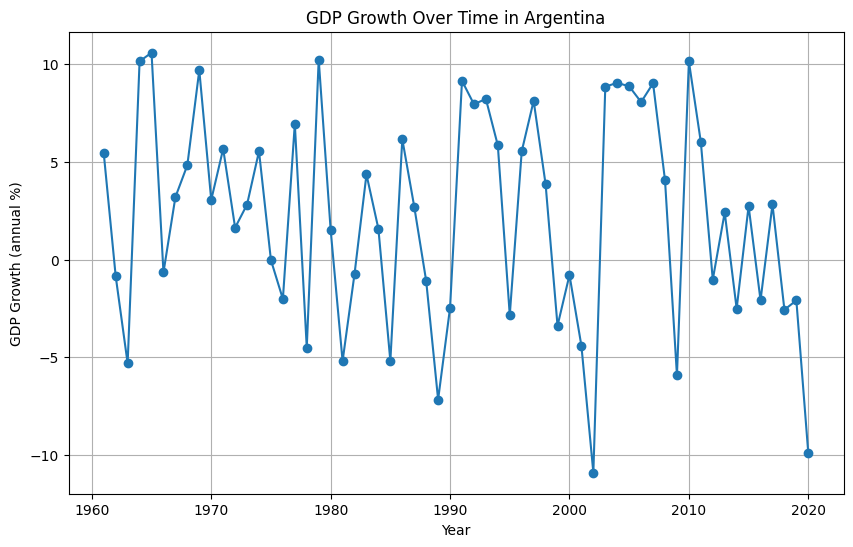

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific country (e.g., Argentina)
argentina_data = gdp_data_melted[gdp_data_melted['Country Name'] == 'Argentina']

# Plot GDP growth over time
plt.figure(figsize=(10, 6))
plt.plot(argentina_data['Year'], argentina_data['GDP Growth'], marker='o')
plt.title('GDP Growth Over Time in Argentina')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.grid(True)
plt.show()


In [ ]:
# Function to create GDPGrowth nodes in Neo4j
def create_gdp_growth_nodes(tx, country_code, year, gdp_growth):
    tx.run("""
        CREATE (g:GDPGrowth {
            country_code: $country_code,
            year: $year,
            gdp_growth: $gdp_growth
        })
        """,
        country_code=country_code,
        year=year,
        gdp_growth=gdp_growth
    )

# Iterate through the GDP growth data and create nodes in Neo4j
with driver.session() as session:
    for index, row in gdp_data_melted.iterrows():
        session.execute_write(create_gdp_growth_nodes, row['Country Code'], row['Year'], row['GDP Growth'])

print("GDP Growth nodes created successfully!")


GDP Growth nodes created successfully!


In [ ]:
# Function to link GDPGrowth nodes to AgroZone nodes
def link_gdp_growth_to_agrozones(tx, country_code):
    tx.run("""
        MATCH (z:AgroZone {cluster_id: $country_code}), (g:GDPGrowth {country_code: $country_code})
        CREATE (z)-[:HAS_GDP_GROWTH]->(g)
        """,
        country_code=country_code
    )

# Iterate through the GDP growth data and create relationships
with driver.session() as session:
    for index, row in gdp_data_melted.iterrows():
        session.execute_write(link_gdp_growth_to_agrozones, row['Country Code'])

print("GDPGrowth nodes linked to AgroZone nodes successfully!")


In [ ]:
import pandas as pd
from neo4j import GraphDatabase, basic_auth

# Neo4j connection details
uri = "neo4j+s://6e4cfb72.databases.neo4j.io"  # Neo4j connection string
username = "neo4j"  # Neo4j username
password = "6Sw2mlJZ_NxtZiZiE9DwX0EWndO2lcGXwYpIqzFxf-A"  # Neo4j password

driver = GraphDatabase.driver(uri, auth=basic_auth(username, password))

# File path
file_path = "/content/FAOSTAT_data_en_2-19-2025.csv"

# Function to load FAOSTAT data into Neo4j
def load_faostat_data(tx, country, crop, year, value):
    try:
        tx.run(
            """
            MERGE (c:Country {name: $country})
            MERGE (p:Crop {name: $crop})
            MERGE (y:Year {year: $year})
            MERGE (c)-[:PRODUCES]->(p)
            MERGE (p)-[:YIELD {value: $value}]->(y)
            """,
            {"country": country, "crop": crop, "year": year, "value": value},  # Parameters as a dictionary
        )
    except Exception as e:
        print(f"Error processing row: {country}, {crop}, {year}, {value}. Error: {e}")

try:
    # Read the CSV file using pandas
    df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')

    # Select only relevant columns and rename them
    df = df[['Area', 'Item', 'Year', 'Value']]
    df = df.rename(columns={'Area': 'country', 'Item': 'crop', 'Year': 'year', 'Value': 'value'})

    # Remove rows with missing data
    df = df.dropna()

    # Load data into Neo4j
    with driver.session() as session:
        # Use the apply function to process each row
        df.apply(lambda row: session.execute_write(load_faostat_data, row['country'], row['crop'], row['year'], row['value']), axis=1)

    print("FAOSTAT data loaded successfully!")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: CSV file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse CSV file at {file_path}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

finally:
    # Close the Neo4j driver connection
    driver.close()


In [ ]:
import pandas as pd
from neo4j import GraphDatabase, basic_auth

# Neo4j connection details
uri = "neo4j+s://6e4cfb72.databases.neo4j.io"  # Neo4j connection string
username = "neo4j"  # Neo4j username
password = "6Sw2mlJZ_NxtZiZiE9DwX0EWndO2lcGXwYpIqzFxf-A"  # Neo4j password

driver = GraphDatabase.driver(uri, auth=basic_auth(username, password))

# File path
file_path = "/content/FAOSTAT_data_en_2-19-2025 (1).csv"

# Function to load climate data into Neo4j
def load_climate_data(tx, country, year, temp_change, element_type):
    try:
        tx.run(
            """
            MERGE (c:Country {name: $country})
            MERGE (y:Year {year: $year})
            MERGE (t:Temperature {
                change: $temp_change,
                type: $element_type
            })
            MERGE (c)-[:HAS_TEMPERATURE]->(t)-[:MEASURED_IN]->(y)
            """,
            {"country": country, "year": year, "temp_change": temp_change, "element_type": element_type},  # Parameters as a dictionary
        )
    except Exception as e:
        print(f"Error processing row: {country}, {year}, {temp_change}, {element_type}. Error: {e}")

try:
    # Read the CSV file using pandas
    df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')

    # Select only relevant columns and rename them
    df = df[['Area', 'Year', 'Value', 'Element']]
    df = df.rename(columns={'Area': 'country', 'Year': 'year', 'Value': 'temp_change', 'Element': 'element_type'})

    # Remove rows with missing data
    df = df.dropna()

    # Load data into Neo4j
    with driver.session() as session:
        # Use the apply function to process each row
        df.apply(lambda row: session.execute_write(load_climate_data, row['country'], row['year'], row['temp_change'], row['element_type']), axis=1)

    print("Climate data loaded successfully!")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: CSV file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse CSV file at {file_path}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

finally:
    # Close the Neo4j driver connection
    driver.close()


In [ ]:
import pandas as pd
from neo4j import GraphDatabase, basic_auth

# Neo4j connection details
uri = "neo4j+s://6e4cfb72.databases.neo4j.io"  # Neo4j connection string
username = "neo4j"  # Neo4j username
password = "6Sw2mlJZ_NxtZiZiE9DwX0EWndO2lcGXwYpIqzFxf-A"  # Neo4j password

driver = GraphDatabase.driver(uri, auth=basic_auth(username, password))

# File path
file_path = "/content/FAOSTAT_data_en_2-19-2025 (2).csv"

# Function to load fertilizer data into Neo4j
def load_fertilizer_data(tx, country, year, fertilizer_type, amount, unit):
    try:
        tx.run(
            """
            MERGE (c:Country {name: $country})
            MERGE (y:Year {year: $year})
            MERGE (f:Fertilizer {
                type: $fertilizer_type,
                amount: $amount,
                unit: $unit
            })
            MERGE (c)-[:USED]->(f)-[:USED_IN]->(y)
            """,
            {"country": country, "year": year, "fertilizer_type": fertilizer_type, "amount": amount, "unit": unit},  # Parameters as a dictionary
        )
    except Exception as e:
        print(f"Error processing row: {country}, {year}, {fertilizer_type}, {amount}, {unit}. Error: {e}")

try:
    # Read the CSV file using pandas
    df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')

    # Select only relevant columns and rename them
    df = df[['Area', 'Year', 'Element', 'Value', 'Unit']]
    df = df.rename(columns={'Area': 'country', 'Year': 'year', 'Element': 'fertilizer_type', 'Value': 'amount', 'Unit': 'unit'})

    # Remove rows with missing data
    df = df.dropna()

    # Load data into Neo4j
    with driver.session() as session:
        # Use the apply function to process each row
        df.apply(lambda row: session.execute_write(load_fertilizer_data, row['country'], row['year'], row['fertilizer_type'], row['amount'], row['unit']), axis=1)

    print("Fertilizer data loaded successfully!")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: CSV file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse CSV file at {file_path}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

finally:
    # Close the Neo4j driver connection
    driver.close()


ModuleNotFoundError: No module named 'neo4j'

In [ ]:
import pandas as pd
from neo4j import GraphDatabase

# Neo4j connection details
NEO4J_URI = "neo4j+s://6e4cfb72.databases.neo4j.io"  # Neo4j connection string
NEO4J_USERNAME = "neo4j"  # Neo4j username
NEO4J_PASSWORD = "6Sw2mlJZ_NxtZiZiE9DwX0EWndO2lcGXwYpIqzFxf-A"  # Neo4j password

driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# File path
file_path = "/content/FAOSTAT_data_en_2-19-2025 (3).csv"

# Function to load fertilizer data into Neo4j
def load_fertilizer_data(tx, country, year, element, value, unit):
    try:
        tx.run(
            """
            MERGE (c:Country {name: $country})
            MERGE (y:Year {year: $year})
            MERGE (f:Fertilizer {
                element: $element,
                value: $value,
                unit: $unit
            })
            MERGE (c)-[:USED]->(f)-[:USED_IN]->(y)
            """,
            {"country": country, "year": year, "element": element, "value": value, "unit": unit},  # Parameters as a dictionary
        )
    except Exception as e:
        print(f"Error processing row: {country}, {year}, {element}, {value}, {unit}. Error: {e}")

try:
    # Read the CSV file using pandas
    df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')

    # Select relevant columns and rename them for clarity
    df = df[['Area', 'Year', 'Element', 'Value', 'Unit']]
    df = df.rename(columns={'Area': 'country', 'Year': 'year', 'Element': 'element', 'Value': 'value', 'Unit': 'unit'})

    # Handle missing values (remove rows with NaN in critical columns)
    df = df.dropna(subset=['country', 'year', 'element', 'value', 'unit'])

    # Load data into Neo4j
    with driver.session() as session:
        # Efficiently load data using pandas' apply
        df.apply(lambda row: session.execute_write(load_fertilizer_data, row['country'], row['year'], row['element'], row['value'], row['unit']), axis=1)

    print("Fertilizer data loaded successfully!")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: CSV file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse CSV file at {file_path}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

finally:
    # Close the Neo4j driver connection
    driver.close()


In [ ]:
import pandas as pd
from neo4j import GraphDatabase

# Neo4j connection details
NEO4J_URI = "neo4j+s://6e4cfb72.databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "6Sw2mlJZ_NxtZiZiE9DwX0EWndO2lcGXwYpIqzFxf-A"

# Initialize Neo4j driver
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# File path
file_path = "/content/FAOSTAT_data_en_2-19-2025 (4).csv"

# Function to load SDG data into Neo4j
def load_sdg_data(tx, country, year, indicator_value, unit):
    try:
        tx.run(
            """
            MERGE (c:Country {name: $country})
            MERGE (y:Year {year: $year})
            MERGE (i:Indicator {
                value: $indicator_value,
                unit: $unit,
                name: "2.1.1 Number of undernourished people"
            })
            MERGE (c)-[:HAS_INDICATOR]->(i)-[:MEASURED_IN]->(y)
            """,
            country=country,
            year=year,
            indicator_value=indicator_value,
            unit=unit,
        )
    except Exception as e:
        print(f"Error processing row: {country}, {year}, {indicator_value}, {unit}. Error: {e}")

try:
    # Read the CSV file using pandas
    # Use 'on_bad_lines' instead of 'error_bad_lines' (deprecated in pandas v1.3.0)
    df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')

    # Select relevant columns and rename for clarity
    df = df[['Area', 'Year', 'Value', 'Unit']]
    df = df.rename(columns={'Area': 'country', 'Year': 'year', 'Value': 'indicator_value', 'Unit': 'unit'})

    # Handle missing values (remove rows with NaN in critical columns)
    df = df.dropna(subset=['country', 'year', 'indicator_value', 'unit'])

    # Load data into Neo4j
    with driver.session() as session:
        # Use pandas' apply function to process each row
        df.apply(lambda row: session.execute_write(load_sdg_data, row['country'], row['year'], row['indicator_value'], row['unit']), axis=1)

    print("SDG indicator data loaded successfully!")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: CSV file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse CSV file at {file_path}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

finally:
    # Close the Neo4j driver connection
    driver.close()
